<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#数据集说明" data-toc-modified-id="数据集说明-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>数据集说明</a></span></li><li><span><a href="#附录" data-toc-modified-id="附录-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>附录</a></span><ul class="toc-item"><li><span><a href="#主成分分析-PCA" data-toc-modified-id="主成分分析-PCA-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>主成分分析 PCA</a></span></li><li><span><a href="#支持向量机-SVC" data-toc-modified-id="支持向量机-SVC-0.2.2"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>支持向量机 SVC</a></span></li><li><span><a href="#make_pipeline" data-toc-modified-id="make_pipeline-0.2.3"><span class="toc-item-num">0.2.3&nbsp;&nbsp;</span>make_pipeline</a></span></li><li><span><a href="#sklearn.model_selection.GridSearchCV" data-toc-modified-id="sklearn.model_selection.GridSearchCV-0.2.4"><span class="toc-item-num">0.2.4&nbsp;&nbsp;</span>sklearn.model_selection.GridSearchCV</a></span></li><li><span><a href="#sklearn.metrics.classification_report" data-toc-modified-id="sklearn.metrics.classification_report-0.2.5"><span class="toc-item-num">0.2.5&nbsp;&nbsp;</span>sklearn.metrics.classification_report</a></span></li><li><span><a href="#seaborn.heatmap" data-toc-modified-id="seaborn.heatmap-0.2.6"><span class="toc-item-num">0.2.6&nbsp;&nbsp;</span>seaborn.heatmap</a></span></li></ul></li></ul></li><li><span><a href="#参考文献" data-toc-modified-id="参考文献-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>参考文献</a></span></li></ul></div>

## 数据集说明
这个数据集是收集了一些名人的JPEG图片,在互联网上，所有细节都可以在官方网站上找到：http://vis-www.cs.umass.edu/lfw/
每张照片都集中在一张脸上。典型的任务称为,人脸验证：给定一对两张图片，一个二进制分类器,必须预测两个图像是否来自同一个人。另一个任务，人脸识别或人脸识别是：根据一张不认识的人的脸的照片，确定他的名字指的是以前看过的确定的人员。人脸验证和人脸识别都是典型的对经过训练以执行人脸检测的模型的输出执行。这个最流行的人脸检测模型叫做 Viola Jones,在OpenCV库中实现。LFW的脸是这样提取的来自各种在线网站的人脸检测仪。

**数据集特征：**
- 5749级
- 样本总数13233
- 维度5828
- 功能实数，介于0和255之间

In [10]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
# 导入数据
# min_faces_per_person 每个人的最小面数
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


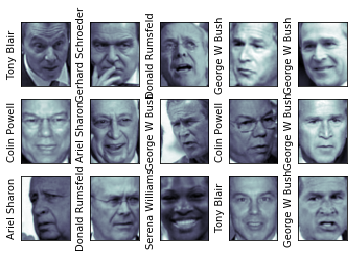

In [2]:
# 简单演示数据集
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]], color='black')
plt.show()

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# 归一化，然后降维为150维
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(pca, svc)

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid, cv=5)
 
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 11.9 s
{'svc__C': 1}


In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

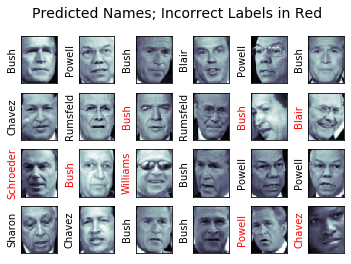

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.62      0.61        16
     Colin Powell       0.73      0.85      0.78        66
  Donald Rumsfeld       0.61      0.70      0.66        27
    George W Bush       0.84      0.79      0.81       140
Gerhard Schroeder       0.62      0.67      0.64        24
      Hugo Chavez       0.86      0.71      0.77        17
   Jacques Chirac       0.71      0.50      0.59        10
    Jean Chretien       0.75      0.86      0.80        14
    John Ashcroft       0.65      0.69      0.67        16
Junichiro Koizumi       0.89      0.73      0.80        11
  Serena Williams       0.67      0.67      0.67         9
       Tony Blair       0.78      0.70      0.74        40

         accuracy                           0.75       390
        macro avg       0.72      0.71      0.71       390
     weighted avg       0.76      0.75      0.75       390



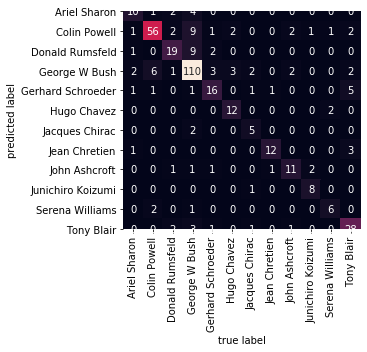

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 附录
### 主成分分析 PCA

```py
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, terated_power='auto', random_state=None)
```

- `n_components`:  我们可以利用此参数设置想要的特征维度数目，可以是int型的数字，也可以是阈值百分比，如95%，让PCA类根据样本特征方差来降到合适的维数，也可以指定为string类型，MLE。
- `copy`： bool类型，TRUE或者FALSE，是否将原始数据复制一份，这样运行后原始数据值不会改变，默认为TRUE。
- `whiten`：bool类型，是否进行白化（就是对降维后的数据进行归一化，使方差为1），默认为FALSE。如果需要后续处理可以改为TRUE。
- `explained_variance_`： 代表降为后各主成分的方差值，方差值越大，表明越重要。
- `explained_variance_ratio_`： 代表各主成分的贡献率。
- `inverse_transform()`： 将降维后的数据转换成原始数据，X=pca.inverse_transform(newX)。

### 支持向量机 SVC
实现基于libsvm。拟合时间尺度至少与样本数量成二次关系，超过数万个样本可能是不切实际的。对于大型数据集，请考虑改用sklearn.svm.LinearSVC或sklearn.linear_model.sgdclassier，可能是在sklearn.kernel_approximation.Nystroem transformer之后。
多类支持是根据一对一的方案来处理的。
```py
class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, robability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,decision_function_shape='ovr', reak_ties=False, random_state=None)
```

- kernel 指定要在算法中使用的内核类型。它必须是“linear”、“poly”、“rbf”、“sigmoid”、“precomputed”或可调用的。如果没有给出，将使用“rbf”。如果给定了一个可调用的，它将用于从数据矩阵中预计算核矩阵；该矩阵应该是一个形状数组（n_samples，n_samples）。
- class_weight 类权重{dict，'balanced'}，可选，将SVC的i类参数C设置为C类权重[i]\*C 。如果不给，所有的班级都应该有一个权重。“平衡”模式使用y的值自动调整与输入数据中的类频率成反比的权重，作为n个样本/（n个类*np.bincount（y））

### make_pipeline

```py
sklearn.pipeline.make_pipeline(*steps, **kwargs)
```

从给定的估计器构造一个管道。这是管道构造函数的简写；它不需要也不允许命名估计器。相反，它们的名称将自动设置为其类型的小写。

### sklearn.model_selection.GridSearchCV
估计量对指定参数值的穷举搜索。重要的成员是合适的，预测。
GridSearchCV实现了“fit”和“score”方法。如果在使用的估计器中实现了“预测”、“预测概率”、“决策函数”、“变换”和“逆变换”，则它也实现了“预测”、“预测概率”、“决策函数”、“变换”和“逆变换”。应用这些方法的估计器的参数通过参数网格上的交叉验证网格搜索进行优化。
```py
class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
```
param_griddict dict或词典列表
- 以参数名称（字符串）为键的字典，以参数设置的列表尝试作为值的字典，或此类字典的列表，在这种情况下，将探索列表中每个字典所跨越的网格。这样可以搜索任何顺序的参数设置

cv int，交叉验证生成器或可迭代的，可选的,确定交叉验证拆分策略。简历的可能输入是：
- None，要使用默认的5倍交叉验证，
- Interg，用于指定的折叠次数(Stratified)KFold，
- CV splitter,
- 可迭代的屈服（训练，测试）拆分为索引数组。
- 对于整数/无输入，如果估计器是分类器，并且y是二进制或多类，StratifiedKFold则使用该估计器。在所有其他情况下，KFold均使用。

### sklearn.metrics.classification_report
生成显示主要分类指标的文本报告

```py
sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
```
- y_true1d 一维数组，或标签指示符数组/稀疏矩阵基本真实（正确）目标值。
- y_pred1d 一维数组，或标签指示符数组/稀疏矩阵由分类器返回的估计目标。
- labelsarray, shape = [n_labels] 要包含在报表中的标签索引的可选列表。
- target_nameslist String 类型 ，与标签匹配的可选显示名称（顺序相同）。

### seaborn.heatmap
绘制矩形数据作为颜色编码矩阵。
这是一个轴级别的函数，如果没有为参数提供热图，则会将热图绘制到当前活动的轴中ax。除非cbar 是False或为提供单独的Axes ，否则将占用此Axes空间的一部分并将其用于绘制颜色图cbar_ax
```py
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

# 参考文献 
[1] https://blog.csdn.net/asialee_bird/article/details/81051281?utm_source=app 

[2] 《统计学习方法》第 2 版，李航 

[3] https://blog.csdn.net/Snippers/article/details/97788694?depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2&utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2

[4] https://blog.csdn.net/v_july_v/article/details/7624837

[5] https://blog.csdn.net/u014688145/article/details/53688585

[6] https://blog.csdn.net/weixin_40123108/article/details/84378202?utm_source=app